### Phase 1:  Introduction and Data Collection

### Introduction

EDSA has provided a challege to construct regression capable of accurately predicting how much a kilogram of golden delicious apples apple will cost given certain parameters. This challenge will follow the five phases of the data science process, which include data collection, cleaning, exploratory data analysis, model building and model deployment.



### Data Collection

The data for this dataset was obtained from Durban Fresh Produce Market and adjusted to suit this challenge's needs.
The data supplied includes:
sample_submission.csv - Sample of the submission format for the hackathon.
df - test_set.csv - The test split of the dataset.
df - train_set.csv - The training split of the dataset.

# Phase 2: Data Cleaning

We will start by first importing some of the packages we will need to clean and explore our data. This is not an exclusive list of all the packages. Should we need more packages in the process we will import them at a later stage as needed.

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors
from scipy import stats

from sklearn import linear_model # Scikit learn library that implements generalized linear models

from math import log

from sklearn import neighbors
 
from math import sqrt



In [3]:
df_train = pd.read_csv('Advanced_regression_predict-Starter-Data-2629/df-train_set.csv') # import the train data for exploration

In [4]:
df_train.head()# explore the data

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [6]:
df_train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

The first step in our datacleaning process is to check for null values and decide how to deal with them. As we can see the table has 13 columns, all the columns are set as non_ null which tells us that we dont have any null values to deal with. 
If we have a look at the data types, we can already tell that most of the data types are appropriate for the columns, The only data type that we could change would be the date column, should we need the date column in our data analysis or model building phase it would be easier to deal with it as a datetime datatype rather than an object.

In [7]:
df_train['Date'] = pd.to_datetime(df_train['Date']) # change the date column from string datatype
                                                    # to datetime datatype

In [8]:
df_train.info() # lets confirm our changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          64376 non-null  object        
 1   Container         64376 non-null  object        
 2   Size_Grade        64376 non-null  object        
 3   Weight_Kg         64376 non-null  float64       
 4   Commodities       64376 non-null  object        
 5   Date              64376 non-null  datetime64[ns]
 6   Low_Price         64376 non-null  float64       
 7   High_Price        64376 non-null  float64       
 8   Sales_Total       64376 non-null  float64       
 9   Total_Qty_Sold    64376 non-null  int64         
 10  Total_Kg_Sold     64376 non-null  float64       
 11  Stock_On_Hand     64376 non-null  int64         
 12  avg_price_per_kg  64376 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 6.4+ MB


# Phase 3: Exploratory Data Analysis

## Univariate Analysis

Lets analyse each feature to see what insights we can gain from them. As we can see, we have 5 categorical data types and 8 numerical datatypes. We will analyse the numerical data types using descriptive statistics.

In [9]:
new_df_train = df_train[df_train.Commodities == 'APPLE GOLDEN DELICIOUS'] # filter for APPLE GOLDEN DELICIOUS
new_df_train.describe()# calculates our 5 number summary as well as our measures of central tendency

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


From this breakdown we can see that the maximum average price per kg we have sold our golden apples for is R21.24 and the minimum is R0.25.

In [10]:
new_df_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

From this analysis we can see that almost all of our features have a high positive skew meaning that most of our data is skewed to the left. 

In [11]:
new_df_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

This indicates that most of our data has High kurtosis which indicates a large number of outliers exist in our data. Why is that?? maybe because the quantities purchased from the market were varied. Some people purchased 400 kg worth of apples, probably for resale at wholesalers and some bought 3kg worth of apples e.g maybe for household or for resale at a street corner. Therefore the skewness and kurtosis of most of our columns is to be expected.However, we can see that our avrage price per kg is fairly symmetrical and a low kutosis whis is to be expected because the avg_price_per_kg column is a calculated column that has been averaged and calculated per kg.

 Lets look at the distribution of our numerical features to get a better understanding.

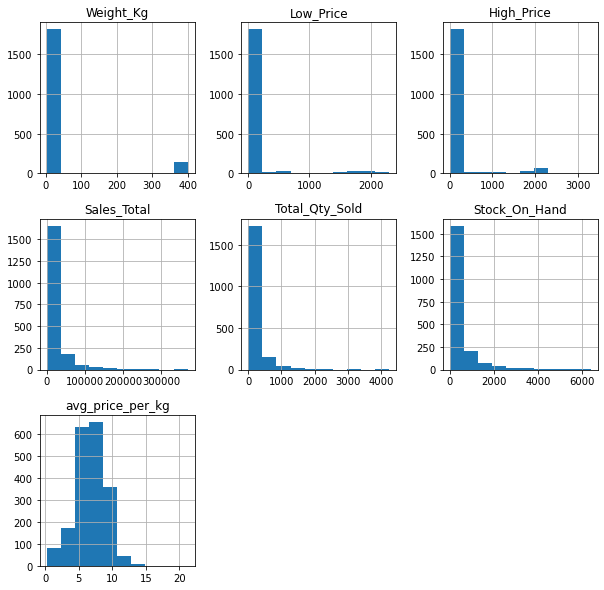

In [12]:
columns = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Stock_On_Hand','avg_price_per_kg' ] # create a list of all numerical columns
new_df_train[columns].hist(figsize=(10,10));

As expected, our average price per kg follows a normal distribution with most of our prices lieing on the R5 to R10 range. However the rest of our variables are affeted a lot by outliers.

Lets draw boxplots on our columns to confirm the outliers.

<AxesSubplot:xlabel='Weight_Kg'>

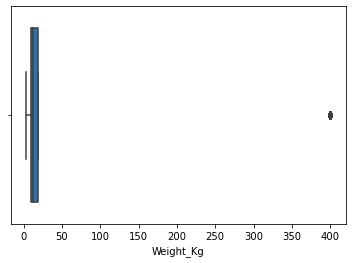

In [13]:

sns.boxplot(x='Weight_Kg', data=new_df_train)

<AxesSubplot:xlabel='Stock_On_Hand'>

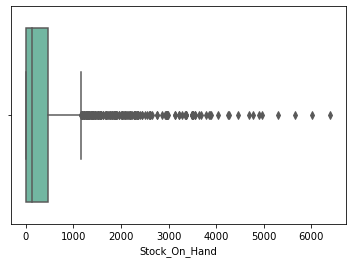

In [14]:
sns.boxplot(x = 'Stock_On_Hand', data=new_df_train, orient="h", palette="Set2")

<AxesSubplot:xlabel='avg_price_per_kg'>

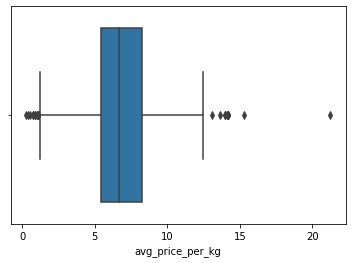

In [15]:
sns.boxplot(x='avg_price_per_kg', data=new_df_train)

<AxesSubplot:xlabel='Sales_Total'>

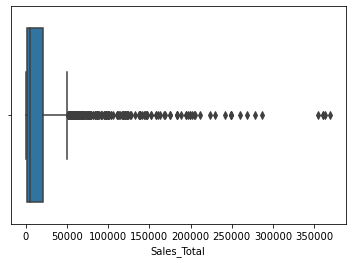

In [16]:
sns.boxplot(x='Sales_Total', data=new_df_train)


<AxesSubplot:xlabel='Total_Qty_Sold'>

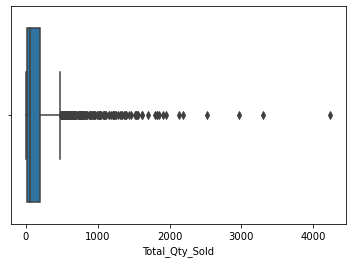

In [17]:
sns.boxplot(x='Total_Qty_Sold', data=new_df_train)

From the box plots above we can clearly see where our outliers are and can

Let us remove the outliers to see if we can get a more normal distribution of our numerical features.

In [18]:
df_train_o = new_df_train[new_df_train['Weight_Kg']<= 20]
df_train_o = df_train_o[df_train_o['Sales_Total']<= 50000]
df_train_o = df_train_o[df_train_o['avg_price_per_kg']<= 15]
df_train_o = df_train_o[df_train_o['Stock_On_Hand']<= 1300]
df_train_o = df_train_o[df_train_o['Total_Qty_Sold']<= 1300]

In [19]:
print(df_train_o.shape)
df_train_o.describe()

(1526, 13)


,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000
mean,12.635256,84.436435,100.823067,8852.199869,104.703145,1270.093578,231.437746,6.907136
std,4.029132,46.685901,52.746000,11324.096521,136.856293,1599.035083,289.767852,2.182577
min,3.000000,5.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.550000
25%,9.000000,50.000000,60.000000,971.250000,12.000000,148.050000,8.000000,5.560000
50%,12.000000,70.000000,84.000000,4060.000000,54.000000,659.400000,109.000000,6.685000
75%,18.300000,120.000000,140.000000,11550.000000,143.500000,1733.550000,348.750000,8.397500
max,18.300000,260.000000,270.000000,49860.000000,923.000000,8307.000000,1292.000000,14.210000


After removing the outliers we can see that our data is still enough to create a model out of. Lets see our distrbutions now.

array([[<AxesSubplot:title={'center':'Weight_Kg'}>,
        <AxesSubplot:title={'center':'Low_Price'}>,
        <AxesSubplot:title={'center':'High_Price'}>],
       [<AxesSubplot:title={'center':'Sales_Total'}>,
        <AxesSubplot:title={'center':'Total_Qty_Sold'}>,
        <AxesSubplot:title={'center':'Stock_On_Hand'}>],
       [<AxesSubplot:title={'center':'avg_price_per_kg'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

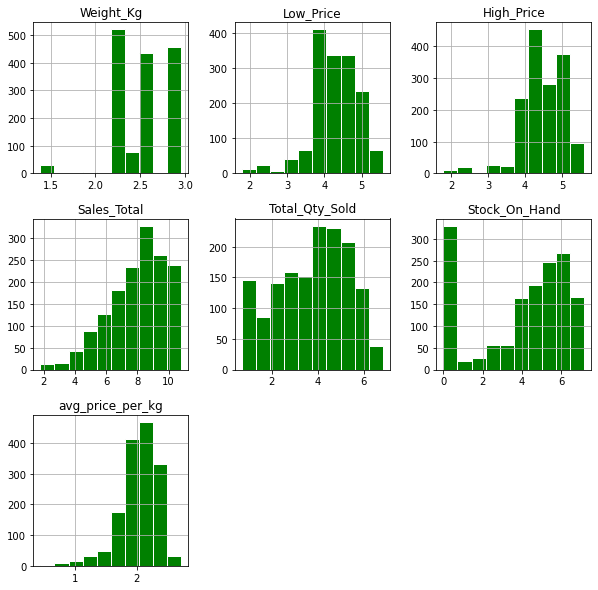

In [20]:
TotalLog = np.log(df_train_o[columns] + 1)
TotalLog.hist(color='green', edgecolor='white', figsize=(10,10))

## Multivariate Analysis

We will start by first analysing the relationships between our features.

At this stage I would like to seperate the Date column into day, month and year so that I can analyse the relationships it has in this dataset.


In [21]:
df_train_o['day'] = df_train_o['Date'].dt.day
df_train_o['month'] = df_train_o['Date'].dt.month
df_train_o['year'] = df_train_o['Date'].dt.year

In [22]:
df_train_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 7 to 64310
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1526 non-null   object        
 1   Container         1526 non-null   object        
 2   Size_Grade        1526 non-null   object        
 3   Weight_Kg         1526 non-null   float64       
 4   Commodities       1526 non-null   object        
 5   Date              1526 non-null   datetime64[ns]
 6   Low_Price         1526 non-null   float64       
 7   High_Price        1526 non-null   float64       
 8   Sales_Total       1526 non-null   float64       
 9   Total_Qty_Sold    1526 non-null   int64         
 10  Total_Kg_Sold     1526 non-null   float64       
 11  Stock_On_Hand     1526 non-null   int64         
 12  avg_price_per_kg  1526 non-null   float64       
 13  day               1526 non-null   int64         
 14  month             1526 

In [23]:
df_train_o.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month,year
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,2020
80,CAPE,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-03-13,55.0,55.0,4840.0,88,792.0,181,6.11,13,3,2020
117,CAPE,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2019-12-30,100.0,100.0,1200.0,12,144.0,119,8.33,30,12,2019
122,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-08-05,70.0,70.0,5600.0,80,880.0,0,6.36,5,8,2020


We will first start by analysing our stocking capabilities which are in the Province and Weight_Kg columns. By looking at the relationship between the province were the produce is grown and the total KG's sold, we can then see which farmers give us the most sales.

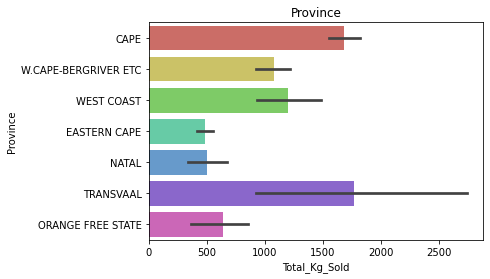

In [24]:
sns.barplot(x = 'Total_Kg_Sold',y= 'Province', data = df_train_o, palette="hls")
plt.title("Province");

As we can see, most of the apples that we sold came from the Transvaal followed by the Cape

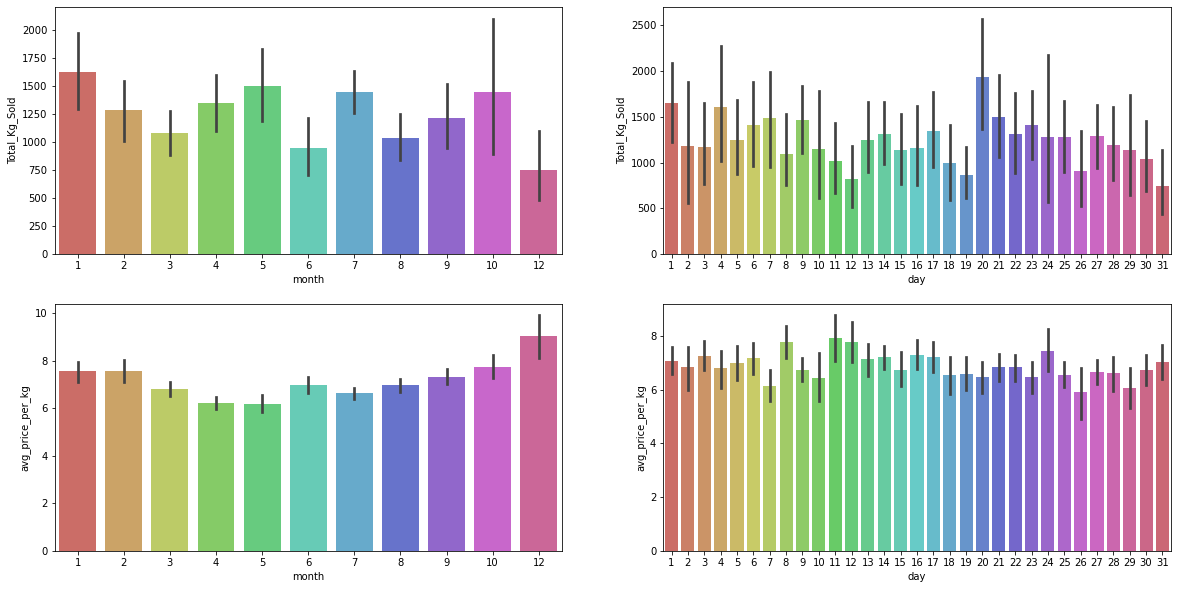

In [25]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.barplot(x = 'month',y= 'Total_Kg_Sold', data = df_train_o, palette="hls", ax=ax[0,0])
sns.barplot(x = 'day',y= 'Total_Kg_Sold', data = df_train_o, palette="hls", ax=ax[0,1])
sns.barplot(x = 'month',y= 'avg_price_per_kg', data = df_train_o, palette="hls", ax=ax[1,0])
sns.barplot(x = 'day',y= 'avg_price_per_kg', data = df_train_o, palette="hls", ax=ax[1,1])

plt.show()

The top two graphs above show us our sales in KG per month and per day. We can see that we've sold more apples in January, may and July then in the other months and our biggest sales quantities happened on the 20th of the month.

The bottom two graphs above tell us the relationship between the months and days of the year and the  average price per kg. It tells us that the avg price per kg of apples is higher in December than in other months.These relationships can possibly guide our decisions on how much stock we need to have on hand on any given month.

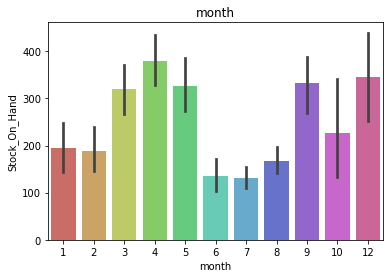

In [26]:
sns.barplot(x = 'month',y= 'Stock_On_Hand', data = df_train_o, palette="hls")
plt.title("month");

The graph above shows us the months where we have the most stock in storage. We can use our predictions on purchase behaviour of our customers to decide how much stock to keep on any given month.

In [27]:
df_train_o.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month,year
Weight_Kg,1.000000,0.788554,0.874696,0.234361,-0.095921,0.147571,0.161826,0.485744,-0.060180,-0.073081,-0.045588
Low_Price,0.788554,1.000000,0.886864,0.144284,-0.156124,0.005982,0.089528,0.831026,-0.074253,0.022831,-0.153010
High_Price,0.874696,0.886864,1.000000,0.312705,-0.035650,0.176737,0.205196,0.772376,-0.072066,-0.012173,-0.130478
Sales_Total,0.234361,0.144284,0.312705,1.000000,0.830985,0.953019,0.215335,0.189959,-0.056709,-0.062858,0.042229
Total_Qty_Sold,-0.095921,-0.156124,-0.035650,0.830985,1.000000,0.923844,0.131386,-0.070477,-0.019124,-0.029160,0.056963
Total_Kg_Sold,0.147571,0.005982,0.176737,0.953019,0.923844,1.000000,0.191444,0.022730,-0.040291,-0.050316,0.057866
Stock_On_Hand,0.161826,0.089528,0.205196,0.215335,0.131386,0.191444,1.000000,0.128045,0.038944,-0.053472,-0.070896
avg_price_per_kg,0.485744,0.831026,0.772376,0.189959,-0.070477,0.022730,0.128045,1.000000,-0.080105,0.056267,-0.174513
day,-0.060180,-0.074253,-0.072066,-0.056709,-0.019124,-0.040291,0.038944,-0.080105,1.000000,0.020826,-0.019190
month,-0.073081,0.022831,-0.012173,-0.062858,-0.029160,-0.050316,-0.053472,0.056267,0.020826,1.000000,-0.429558


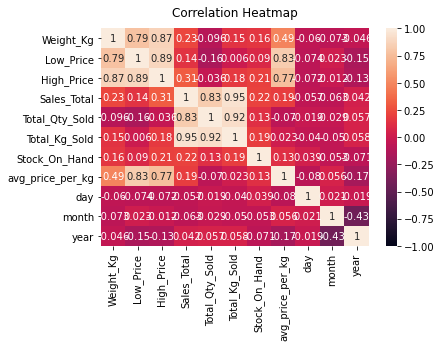

In [28]:
heatmap = sns.heatmap(df_train_o.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

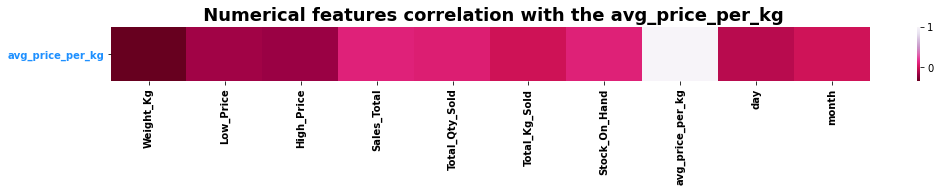

In [29]:
new_df_train['day'] = new_df_train['Date'].dt.day
new_df_train['month'] = new_df_train['Date'].dt.month
num=new_df_train.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['avg_price_per_kg'], ascending=False).head(1), cmap='PuRd_r')
plt.title(" Numerical features correlation with the avg_price_per_kg", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

The graphs above show us heat maps of the correlations between our data before we remove the outliers. As we can see,  weight kg, low price, high price, day and month have a good positive correlation with the avg price per kg. Let us use our dataframe that has reduced the outliers.

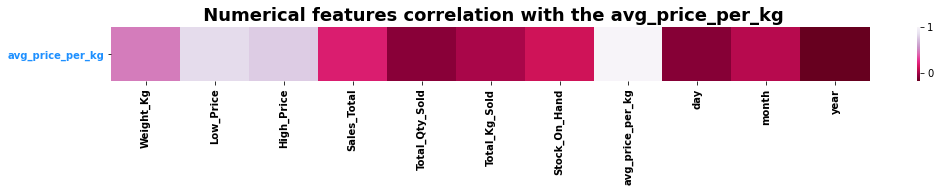

In [30]:
num=df_train_o.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['avg_price_per_kg'], ascending=False).head(1), cmap='PuRd_r')
plt.title(" Numerical features correlation with the avg_price_per_kg", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

This correlation looks very different from the one with outliers not removed which is very telling of our data.

## Dummy Variable Encoding

We have already filtered the data to only include golden delicious apples as our commodities, so we will now drop the commodities column because it has the same repeated data. We will also drop our Date columns because we have already created day, month and year columns. We will also drop the year columns because we only have data for end 2019 to 2020 therefore the year will not make a difference on our preditions. 

In [31]:
new_df_train = new_df_train.drop(['Commodities','Date'], axis = 1)

In [32]:
new_df_train #lets check out our dataset now

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,16,4
40,CAPE,M4183,1S,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5
69,EASTERN CAPE,IA400,1S,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,28,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,96.0,96.0,1920.0,20,240.0,53,8.00,4,3
64291,ORANGE FREE STATE,M4183,1X,18.3,130.0,130.0,7280.0,56,1024.8,74,7.10,22,2
64297,CAPE,JE090,2M,9.0,50.0,60.0,4540.0,89,801.0,793,5.67,22,4
64304,CAPE,JG110,2M,11.0,30.0,40.0,2140.0,70,770.0,0,2.78,4,3


In order to be able to use our categorical data (Province, Container, Size_Grade) in our model we will need to turn it into numerical data using dummy variable encoding.

In [33]:
df_dummies = pd.get_dummies(new_df_train)

#lets make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns]
df_dummies.columns = [col.replace(".","_") for col in df_dummies.columns]
df_dummies.columns = [col.replace("-","_") for col in df_dummies.columns]
#lets have a look at our data
df_dummies.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month,...,Size_Grade_1L,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9,...,1,0,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,...,0,0,0,0,0,0,1,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,16,4,...,0,0,0,0,0,0,0,1,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,...,0,0,1,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,28,9,...,0,0,1,0,0,0,0,0,0,0


In [34]:
df_dummies.shape

(1952, 38)

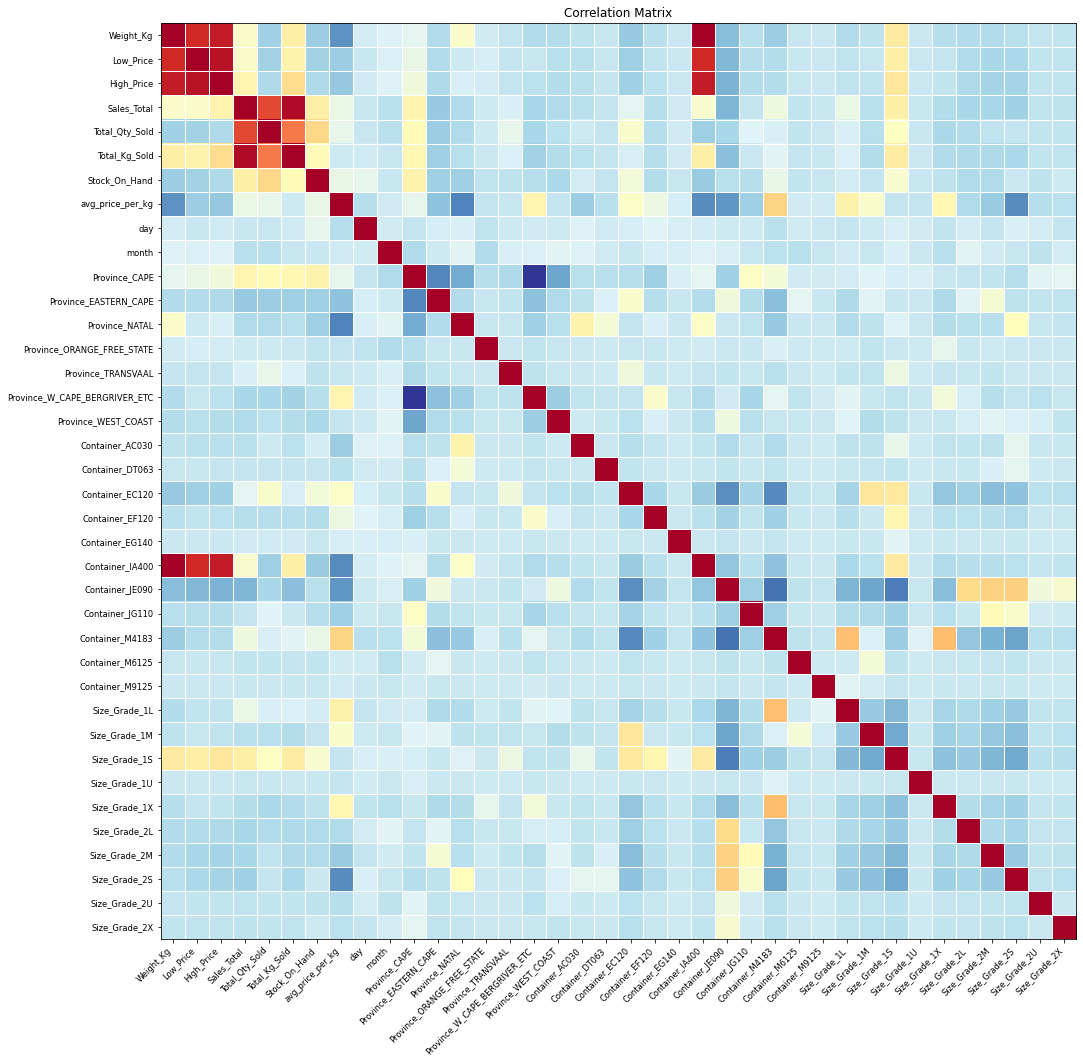

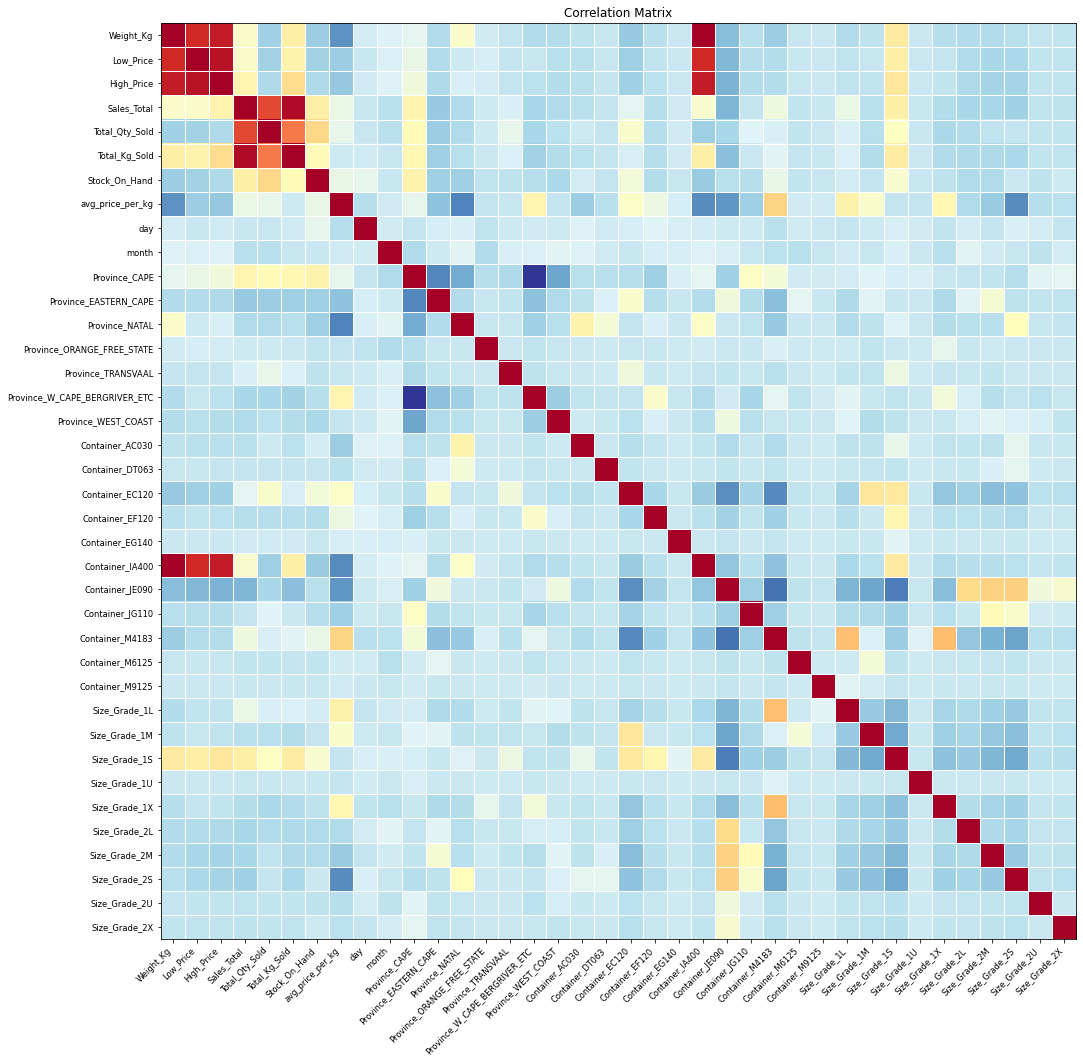

In [35]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax)

As we can see above our table now has 37 columns instead of 15 due to the dummy variables. It is a good idea to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model. So we willspend some time testing different feature engineering methods that will give us the best model.

We will start by using a filter method - variable selectin by variance threshold using sklearn.

## Correlations and Model Structure

In [36]:
# We will now move our target variable to be the last column of our table for ease of reference
column_titles = [col for col in df_dummies.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
df_dummies=df_dummies.reindex(columns=column_titles)

In [37]:
df_dummies.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,day,month,Province_CAPE,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,0.016251,0.047613,0.076956,...,-0.046532,0.314679,-0.007124,-0.068923,-0.080647,-0.083726,-0.064374,-0.029488,-0.036183,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.015764,0.039084,0.102353,...,-0.023629,0.288148,-0.008087,-0.025554,-0.084578,-0.104532,-0.102040,-0.032675,-0.038494,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,0.002058,0.047717,0.130507,...,-0.039365,0.331683,-0.007067,-0.030418,-0.092192,-0.118314,-0.118517,-0.035822,-0.042342,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,-0.011699,-0.055853,0.263142,...,-0.057071,0.285465,-0.012618,-0.075793,-0.105784,-0.109908,-0.132595,-0.040623,-0.046104,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,-0.020402,-0.058639,0.231782,...,-0.061837,0.202586,-0.012138,-0.100508,-0.085270,-0.037270,-0.027759,-0.032337,-0.033339,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,0.003238,-0.023098,0.248872,...,-0.076261,0.306478,-0.010024,-0.081291,-0.097158,-0.093815,-0.100862,-0.035961,-0.041667,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.081923,-0.011749,0.268337,...,-0.028461,0.171355,-0.015715,-0.044300,-0.086927,-0.086702,-0.008891,-0.046085,-0.005271,0.105028
day,0.016251,-0.015764,0.002058,-0.011699,-0.020402,0.003238,0.081923,1.000000,0.010012,-0.027058,...,-0.001329,0.028307,0.009691,-0.030633,0.014469,-0.029280,0.035713,0.019178,-0.026454,-0.071334
month,0.047613,0.039084,0.047717,-0.055853,-0.058639,-0.023098,-0.011749,0.010012,1.000000,-0.088139,...,-0.023882,0.035952,-0.007261,-0.064184,0.067404,0.012777,-0.022811,-0.047931,0.013578,0.005205
Province_CAPE,0.076956,0.102353,0.130507,0.263142,0.231782,0.248872,0.268337,-0.027058,-0.088139,1.000000,...,0.050626,0.023518,0.029836,-0.023778,-0.026692,-0.035552,-0.070124,0.065213,0.072404,0.086135


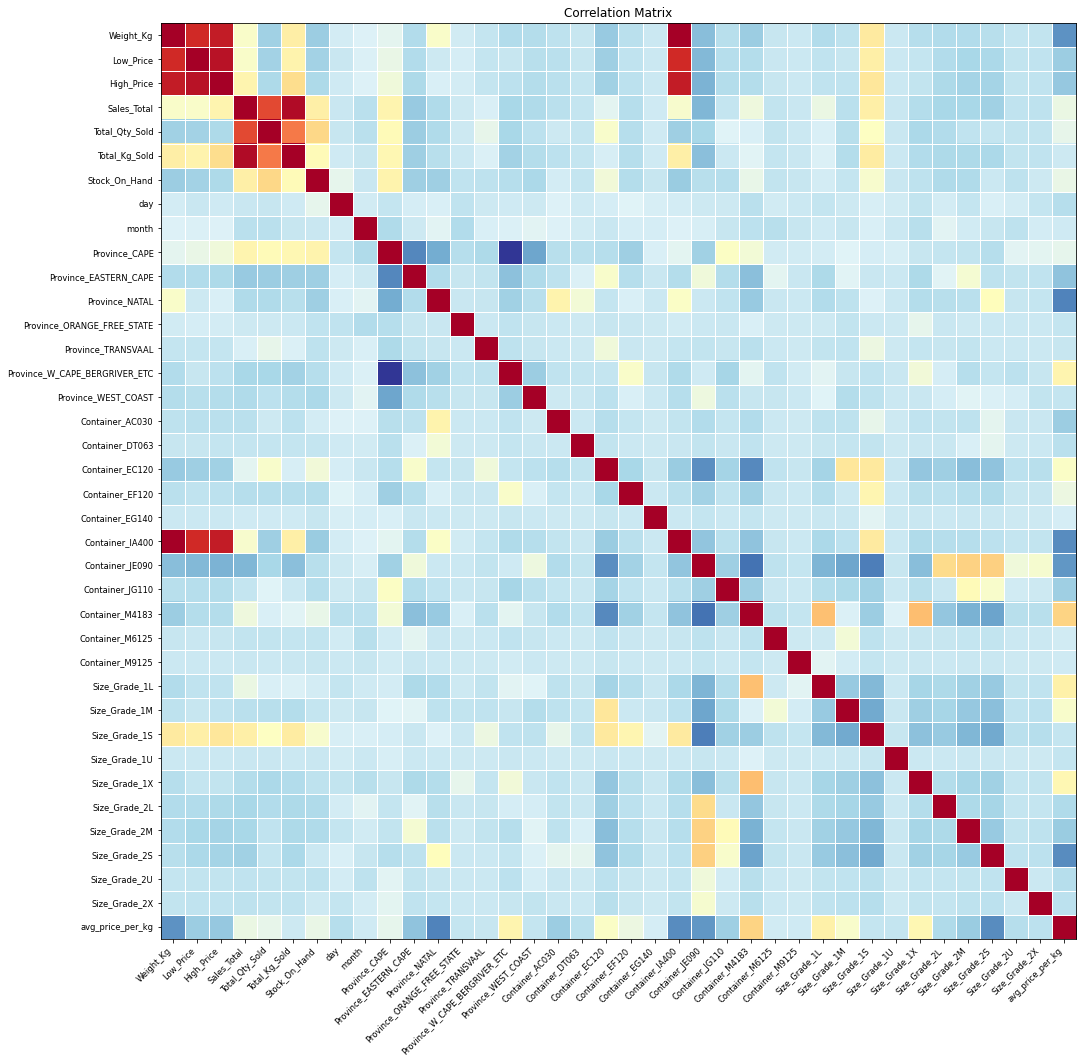

In [38]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

As we can see we now have too many variables which are coursing a lot of redundancy and negatively correlated variables. As we investigate further, we will, at some point, have to drop some of the redundant variables in order to reduce the computational cost of our modeling and improve the performance of the model.

## Fitting the model

Lets try fitting the model as it currently is using statsmodels.ols to see what results the OLS model summary gives us.


In [39]:
#lets import the packages and generate the regression string
from statsmodels.formula.api import ols

# copy the DataFrame with all of the columns:
dfm = df_dummies.copy()

# create a ariable for the dependent variable:
y_name = 'avg_price_per_kg'
# create a variable for the independent variable :we will use all the columns in the model DataFrame
X_names = [col for col in dfm.columns if col != y_name]

# gererate the regression string
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 avg_price_per_kg ~ Weight_Kg + Low_Price + High_Price + Sales_Total + Total_Qty_Sold + Total_Kg_Sold + Stock_On_Hand + day + month + Province_CAPE + Province_EASTERN_CAPE + Province_NATAL + Province_ORANGE_FREE_STATE + Province_TRANSVAAL + Province_W_CAPE_BERGRIVER_ETC + Province_WEST_COAST + Container_AC030 + Container_DT063 + Container_EC120 + Container_EF120 + Container_EG140 + Container_IA400 + Container_JE090 + Container_JG110 + Container_M4183 + Container_M6125 + Container_M9125 + Size_Grade_1L + Size_Grade_1M + Size_Grade_1S + Size_Grade_1U + Size_Grade_1X + Size_Grade_2L + Size_Grade_2M + Size_Grade_2S + Size_Grade_2U + Size_Grade_2X


In [40]:
# Lets fit the model using the dfm dataframe that we just created
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

#we can now print the summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     93.15
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        23:28:00   Log-Likelihood:                -3417.5
No. Observations:                1952   AIC:                             6903.
Df Residuals:                    1918   BIC:                             7093.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Let us now create a new df_dummies table and drop the previous one in order not to assume any relationships beween our features.

In [41]:
df_dummies = pd.get_dummies(new_df_train, drop_first=True)

# Lets make sure that all the column names have underscores instead of whitespaces, fullstps and dashes
df_dummies.columns = [col.replace(" ", "_") for col in df_dummies.columns]
df_dummies.columns = [col.replace(".", "_") for col in df_dummies.columns]
df_dummies.columns = [col.replace("-", "_") for col in df_dummies.columns]

# Reorder columns with the dependent avg_price_per_kg variable as the last column
column_titles = [col for col in df_dummies.columns if col !=
                 'avg_price_per_kg'] + ['avg_price_per_kg']
df_dummies = df_dummies.reindex(columns=column_titles)

df_dummies.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,day,month,Province_EASTERN_CAPE,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,9,9,0,...,0,0,0,0,0,0,0,0,0,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,14,4,0,...,0,0,0,0,0,1,0,0,0,4.55
24,9.0,55.0,55.0,990.0,18,162.0,1506,16,4,0,...,0,0,0,0,0,0,1,0,0,6.11
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4,5,0,...,0,1,0,0,0,0,0,0,0,4.51
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,28,9,1,...,0,1,0,0,0,0,0,0,0,4.50


In [42]:
df_dummies.shape

(1952, 35)

We now have 35 columns instead of 39 that can possibly help us create a model to predict the average price per kg.

We will now use our 35 column table to get a OLS model summary

In [43]:
# We'll keep the model DataFrame, but only specify the columns we want to fit this time
X_names = [col for col in df_dummies.columns if col != y_name]

#gererate the regression string
formula_str = y_name+' ~ '+'+'.join(X_names)

# Lets fit the model using the dfm dataframe 
model = ols(formula=formula_str, data=dfm)
fitted = model.fit()

# print the summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     93.15
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        23:28:00   Log-Likelihood:                -3417.5
No. Observations:                1952   AIC:                             6903.
Df Residuals:                    1918   BIC:                             7093.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

The smallest eigenvalue has improved, but there is still mention of strong multicollinearity in the notes [2]

Let's continue to draw down on our variables now using their significance.

## Variable Selection by Correlation and Significance

We will now attempt to choose the variables that will work best to predict our dependant variable computing the correlations each variable has to to the dependant variable and choosing the ones that have the strongest correlations and the ones that are most significant.

In [44]:
#Lets start with computing the correlations between dependant variable and the independant variables
corrs = df_dummies.corr()['avg_price_per_kg'].sort_values(ascending=False)

In [45]:
# lets build a list of p-values and correlations coefficients for each variable
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'avg_price_per_kg']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['avg_price_per_kg'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.000000
Size_Grade_2S,-0.352996,0.000000
Weight_Kg,-0.337886,0.000000
Container_JE090,-0.322235,0.000000
Province_EASTERN_CAPE,-0.178531,0.000000
High_Price,-0.164496,0.000000
Size_Grade_2M,-0.153372,0.000000
Low_Price,-0.141740,0.000000
Container_JG110,-0.140148,0.000000
Container_IA400,-0.355565,0.000000


Using a logic test with a significance value of 5% or p-value < 0.05, we could infer that all our variables are significant 

We'll keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable called DataFrame X-data

In [46]:
# The dependent variable remains the same:
y_data = df_dummies[y_name]  #we prviously set y_name as avg_price_per_kg'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_dummies[X_names]

In [47]:
# DONT MIND THIS KATLEGO, IM TRYING SOMETHING AND HAD TO COMMENT OUT TO PUSH NOTEBOOK
# Testing, Testing
#X_names =X_names.extend('month')

In [48]:
#Testing testing
#X_data

We will also look for predictor variable pairs which have high corrolation with each other to avoid autocorrolation

In [49]:
#correlation matrix
corr = X_data.corr()

# Find rows and columns where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Container_M4183,Province_W_CAPE_BERGRIVER_ETC,Size_Grade_1X,Container_EC120,Size_Grade_1M,Container_EF120,Sales_Total,Stock_On_Hand,Total_Qty_Sold,Size_Grade_2X,...,Container_JG110,Low_Price,Size_Grade_2M,High_Price,Province_EASTERN_CAPE,Container_JE090,Weight_Kg,Size_Grade_2S,Container_IA400,Province_NATAL
Container_M4183,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province_W_CAPE_BERGRIVER_ETC,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Grade_1X,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Container_EC120,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Grade_1M,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Container_EF120,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Total,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock_On_Hand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Qty_Sold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Grade_2X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will isolate the sections of the matrix, where the off-diagonal correlations are high:

In [50]:
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,High_Price,Low_Price,Weight_Kg,Container_IA400,High_Price,Container_IA400,High_Price,Weight_Kg
Low_Price,0.938140,1.000000,0.863182,0.860219,0.938140,0.860219,0.938140,0.863182
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231


Considering which variables to drop, I will drop the Low_price, High_price columns since they provide the same or similar informatin to my model as the average price per kg which will cause my model to overfit.

In [51]:
# Lets do a ols summary with a new subset that doesnt contain the Container_M4183 variable
X_remove = ['Low_Price','High_Price']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	avg_price_per_kg ~ Container_M4183 + Province_W_CAPE_BERGRIVER_ETC + Size_Grade_1X + Container_EC120 + Size_Grade_1M + Container_EF120 + Sales_Total + Stock_On_Hand + Total_Qty_Sold + Size_Grade_2X + Container_DT063 + Size_Grade_2U + day + Size_Grade_2L + Container_JG110 + Size_Grade_2M + Province_EASTERN_CAPE + Container_JE090 + Weight_Kg + Size_Grade_2S + Container_IA400 + Province_NATAL


In [52]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# print the summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     99.79
Date:                Sun, 16 May 2021   Prob (F-statistic):          1.88e-298
Time:                        23:28:00   Log-Likelihood:                -3609.5
No. Observations:                1952   AIC:                             7265.
Df Residuals:                    1929   BIC:                             7393.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Due to the changes made to our copy above, let us now make those changes to our actual data x_data and x names.

In [53]:
X_data = X_data.drop(['Low_Price', 'High_Price'], axis = 1 )

In [54]:
X_remove = ['Low_Price','High_Price']
X_names = [col for col in X_names if col not in X_remove]

# Variable Selection by Variance Thresholds

we will use a variance threshold of 3% 

## Prepare the data and import sklearn

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

Implementing the Variance Threshold.

In [56]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [57]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Container_M4183                1952 non-null   float64
 1   Province_W_CAPE_BERGRIVER_ETC  1952 non-null   float64
 2   Size_Grade_1X                  1952 non-null   float64
 3   Container_EC120                1952 non-null   float64
 4   Size_Grade_1M                  1952 non-null   float64
 5   Container_EF120                1952 non-null   float64
 6   day                            1952 non-null   float64
 7   Size_Grade_2L                  1952 non-null   float64
 8   Container_JG110                1952 non-null   float64
 9   Size_Grade_2M                  1952 non-null   float64
 10  Province_EASTERN_CAPE          1952 non-null   float64
 11  Container_JE090                1952 non-null   float64
 12  Weight_Kg                      1952 non-null   f

With a threshold of 5% we have gone from 22 to 15 predictors.

##  Model prediction of Average price per kg

With the reduction of features, we can now attempt to fit models to our dataframe.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Pre-processing

Lets do some pre processing of our data to make sure its ready for modelling

In [59]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [60]:
X_var_names

Index(['Container_M4183', 'Province_W_CAPE_BERGRIVER_ETC', 'Size_Grade_1X',
       'Container_EC120', 'Size_Grade_1M', 'Container_EF120', 'day',
       'Size_Grade_2L', 'Container_JG110', 'Size_Grade_2M',
       'Province_EASTERN_CAPE', 'Container_JE090', 'Weight_Kg',
       'Size_Grade_2S', 'Container_IA400', 'Province_NATAL'],
      dtype='object')

In [61]:
# Get training and testing data for variance threshold model

X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [62]:
# Get training and testing data for correlation threshold model
X_corr_names = X_names
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

## Fit models

We will instantiate and fit our models

In [63]:
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [64]:
lm.fit(X_train, y_train);
lm_corr.fit(X_corr_train,y_train);
lm_var.fit(X_var_train,y_train);

### Assessing model accuracy

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

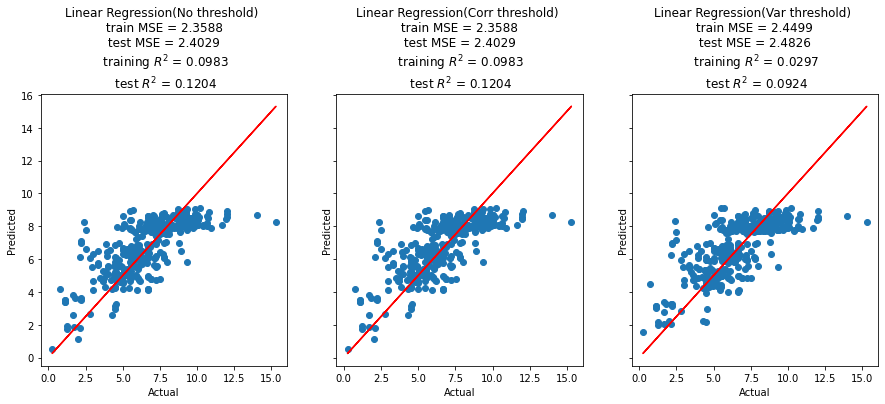

In [66]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])
    

Lenear regression puts our model at score of 1.62885

# Building the Decision Tree Regressor Model

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

Apply  .fit() to train our model

In [69]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1561 entries, 0 to 1560
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Container_M4183                1561 non-null   float64
 1   Province_W_CAPE_BERGRIVER_ETC  1561 non-null   float64
 2   Size_Grade_1X                  1561 non-null   float64
 3   Container_EC120                1561 non-null   float64
 4   Size_Grade_1M                  1561 non-null   float64
 5   Container_EF120                1561 non-null   float64
 6   day                            1561 non-null   float64
 7   Size_Grade_2L                  1561 non-null   float64
 8   Container_JG110                1561 non-null   float64
 9   Size_Grade_2M                  1561 non-null   float64
 10  Province_EASTERN_CAPE          1561 non-null   float64
 11  Container_JE090                1561 non-null   float64
 12  Weight_Kg                      1561 non-null   f

Text(0, 0.5, 'Predicted Y')

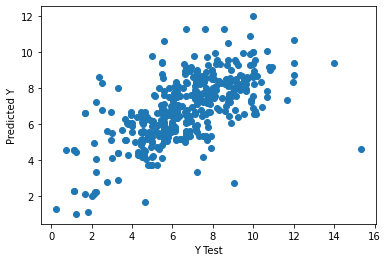

In [71]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [72]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.3209713798562903
MSE: 3.308347101884957
RMSE: 1.8188862256570522


Decision Tree Regressor Model did not improve our RMSE score ( score: 1.86510).

## Building the Random Forest model¶

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [74]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.2190704308314129
MSE: 2.6536238577373275
RMSE: 1.62899473840075


Random Forest model did not improve our RMSE score(score: 1.75706)

## Building the K nearest Neighbor model

In [76]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

Preprocessing – Scaling the features

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

Let us have a look at the error rate for different k values

In [79]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.0269630691967397
RMSE value for k=  2 is: 1.808086181404578
RMSE value for k=  3 is: 1.6572930523712177
RMSE value for k=  4 is: 1.611069827118509
RMSE value for k=  5 is: 1.5344843798554813
RMSE value for k=  6 is: 1.5041933500288782
RMSE value for k=  7 is: 1.5166237009503911
RMSE value for k=  8 is: 1.517965624494948
RMSE value for k=  9 is: 1.508016987555959
RMSE value for k=  10 is: 1.5060659444911468
RMSE value for k=  11 is: 1.5062305720702027
RMSE value for k=  12 is: 1.5043253040069646
RMSE value for k=  13 is: 1.5026570699762491
RMSE value for k=  14 is: 1.50339878569051
RMSE value for k=  15 is: 1.4970457743778418
RMSE value for k=  16 is: 1.5036961963239763
RMSE value for k=  17 is: 1.5042826110930547
RMSE value for k=  18 is: 1.51110801499524
RMSE value for k=  19 is: 1.5041789028481587
RMSE value for k=  20 is: 1.5049702735591408


<AxesSubplot:>

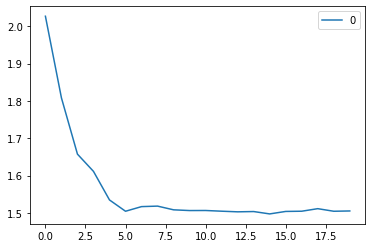

In [80]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

Knearest Neigbors did not improve our RMSE score (score: 3.30712)

## Building the XGBoost model

In [81]:
import xgboost
from xgboost import XGBClassifier

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [83]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

In [84]:
#fit model to training data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[23:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBoost did not improve our RMSE score (score: 2.70208) 

## Prepare data for submission

In [85]:
df_test = pd.read_csv('Advanced_regression_predict-Starter-Data-2629/df-test_set.csv')
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['day'] = df_test['Date'].dt.day
df_test['month'] =df_test['Date'].dt.month
df_test['year'] = df_test['Date'].dt.year

In [86]:
df_test = df_test[df_test.Commodities == 'APPLE GOLDEN DELICIOUS'] # filter for APPLE GOLDEN DELICIOUS
df_test = df_test.drop(['Commodities','Date','year'], axis = 1)


In [87]:
df_test = pd.get_dummies(df_test)
df_test.columns = [col.replace(" ","_") for col in df_test.columns]
df_test.columns = [col.replace(".","_") for col in df_test.columns]
df_test.columns = [col.replace("-","_") for col in df_test.columns]

df_test = df_test[X_var_names]


df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 684
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Container_M4183                685 non-null    uint8  
 1   Province_W_CAPE_BERGRIVER_ETC  685 non-null    uint8  
 2   Size_Grade_1X                  685 non-null    uint8  
 3   Container_EC120                685 non-null    uint8  
 4   Size_Grade_1M                  685 non-null    uint8  
 5   Container_EF120                685 non-null    uint8  
 6   day                            685 non-null    int64  
 7   Size_Grade_2L                  685 non-null    uint8  
 8   Container_JG110                685 non-null    uint8  
 9   Size_Grade_2M                  685 non-null    uint8  
 10  Province_EASTERN_CAPE          685 non-null    uint8  
 11  Container_JE090                685 non-null    uint8  
 12  Weight_Kg                      685 non-null    flo

In [88]:
predictions = lm_var.predict(df_test)


In [89]:
df_test['Index'] = range(1,686)

In [90]:
submissions = pd.DataFrame({'Index':df_test['Index'], 'avg_price_per_kg': predictions})

In [91]:
submissions.head()

,Index,avg_price_per_kg
0,1,8.629727
1,2,8.948981
2,3,8.345071
3,4,8.787335
4,5,8.639051


In [92]:
submissions.to_csv('submissions.csv', index=False)

In [93]:
## Lets save our model with pickle